# 轉折判斷法(Elbow)

## 載入相關套件

## 生成分類資料

In [1]:
from sklearn.datasets import  make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

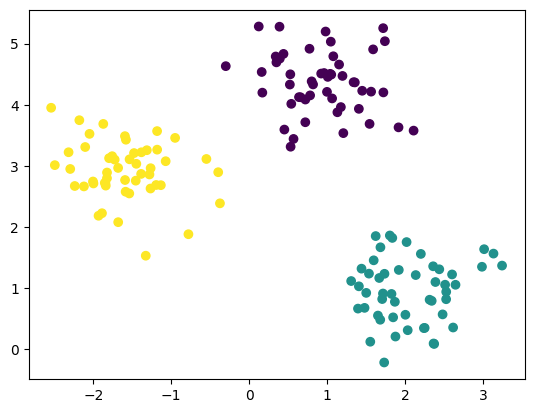

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)#, marker='o', edgecolor='black', s=50
plt.show()

## 訓練模型

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

## 模型評估

In [4]:
# 顯示失真(Distortion)的程度
y_km = km.fit_predict(X)                  
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


## 轉折判斷法(Elbow)

In [5]:
distortions = []
# 測試 1~10 群的失真
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

## 繪圖

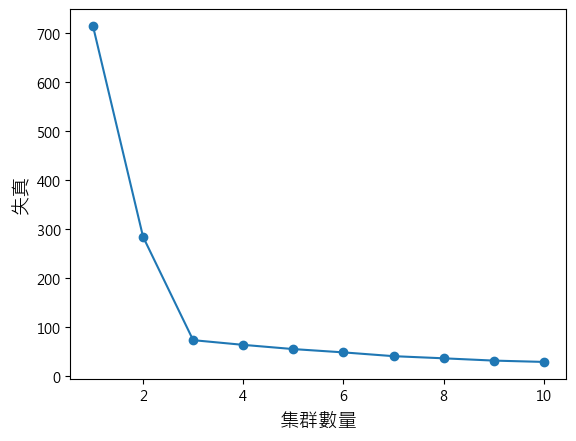

In [6]:
import matplotlib.pyplot as plt

# 修正中文亂碼 
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('集群數量', fontsize=14)
plt.ylabel('失真', fontsize=14);